In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [315]:
class Gambler:
    
    def __init__(self, goal, p, gamma, theta):
        self.goal = goal
        self.p = p
        self.gamma = gamma
        self.theta = theta
        self.states = range(1, goal) # not including terminal states, i.e. 0 and goal
        self.actions = {}
        for s in self.states:
            self.actions[s] = self.get_actions(s)
        
    def get_reward(self, from_state, to_state):
        if to_state == self.goal:
            return 1
        return 0
    
    def get_actions(self, from_state):
        res = []
        for bet in range(1, min(from_state, self.goal-from_state)+1):
            res.append((bet, min(self.goal, from_state+bet), self.p, max(0, from_state-bet), 1-self.p))
        return res
    
    def solve(self):
        values = [0 for _ in xrange(self.goal+1)] # including terminal states
        deterministic_policy = {k:0 for k in xrange(1, self.goal)}
        
        steps = 0
        while True:
            delta = 0
            for s in self.states:
                old_value = values[s]
                # breaking ties by selecting the least bet, very important to produce resulting capital similar to 
                # the one in the book
                new_value = max([(p1 * (self.get_reward(s, to_state1) + self.gamma * values[to_state1])
                                    + p2 * (self.get_reward(s, to_state2) + self.gamma * values[to_state2]), -bet, bet)
                                    for bet, to_state1, p1, to_state2, p2 in self.actions[s]])
                deterministic_policy[s] = new_value[2]
                values[s] = new_value[0]
                delta = max(delta, abs(old_value-values[s]))
            steps += 1
            if delta < self.theta:
                break
        print "steps made:", steps
        
        return values, deterministic_policy
        
        
        
    
    
    
    
        
    


In [316]:
gambler = Gambler(goal=100, p=0.4, gamma=1, theta=10**-12)

In [317]:
values, policy = gambler.solve()

steps made: 1000


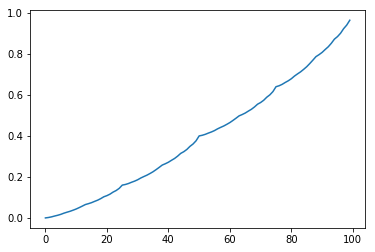

In [318]:
plt.plot(values[:-1])

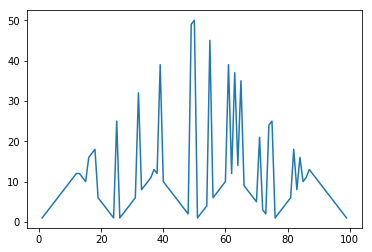

In [319]:
plt.plot(xrange(1, 100), policy.values())

In [278]:
print policy

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 12, 14: 14, 15: 15, 16: 9, 17: 8, 18: 18, 19: 19, 20: 20, 21: 4, 22: 22, 23: 23, 24: 24, 25: 25, 26: 24, 27: 23, 28: 22, 29: 21, 30: 20, 31: 19, 32: 18, 33: 17, 34: 16, 35: 15, 36: 14, 37: 13, 38: 12, 39: 11, 40: 10, 41: 9, 42: 8, 43: 7, 44: 6, 45: 5, 46: 4, 47: 3, 48: 2, 49: 1}
